<a href="https://colab.research.google.com/github/datvodinh10/project-DD/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [1]:
%cd ..

c:\Users\vodin\project-DD


In [2]:
import math
import torch

In [3]:
from src.model.trainer import Trainer

c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\vodin\.conda\envs\pytorchenv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


## Train

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [5]:
config = {
    'transformer':{
        'embed_size': 768,      # model's hidden size
        'num_heads':8,          # number of heads in MSA
        'num_layers':4,         # number of encoder/decoder layer
        'max_len': 320,         # max sequence length
        'dropout':0.1,          # dropout rate
        'bias':False,           # attention bias
        'embed_type': 'position'# {'position','learned'}

    },
    'encoder':{
        'type': 'swin_transformer_v2', # {'swin_transformer','swin_transformer_v2','resnet18','resnet50,'vgg'}
        'swin':{
            'img_size':(64,128),
            'embed_dim':96,
            'window_size':8,
            'in_channels':3,
            'dropout':0.1
        },
    },
    
    'device':device,
    'lr':1e-4,
    'scheduler': {    
        'active':True,
        'first_cycle_steps': 50,
        'cycle_mult': 1,  
        'max_lr': 6e-4,          
        'min_lr': 5e-5,   
        'warmup_steps': 10,      
        'gamma': 0.9  
    },
    'dataloader':{
        'num_workers':0,

    },
    'max_grad_norm': 0.25,
    'batch_size':25,
    'num_epochs':3,
    'save_per_epochs':10,
    'print_type': 'per_batch' # {'per_epoch','per_batch'}
}

In [8]:
SRC_PATH = "test/origin_200"
TARGET_PATH = "test/train_gt.txt"
MODEL_PATH = "data"

# SRC_PATH = "/kaggle/working/new_train"
# TARGET_PATH = "/kaggle/working/train_gt.txt"
# MODEL_PATH = "./data"

In [9]:
trainer = Trainer(config      = config,
                  IMAGE_PATH  = SRC_PATH,
                  TARGET_PATH = TARGET_PATH,
                  MODEL_PATH = MODEL_PATH)

c:\Users\vodin\.conda\envs\pytorchenv\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


TRAIN FROM BEGINNING!


In [10]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Total parameters: {count_parameters(trainer.model)}')

Total parameters: 65675752


In [11]:
trainer.train()

| Epoch   1 / 3: [ ################### ]  100.00% | Loss: 4.5415 | Acc:   14.35% | ETA:     0.0s | 
| Epoch   2 / 3: [ ################### ]  100.00% | Loss: 3.7655 | Acc:   17.22% | ETA:     0.0s | 
| Epoch   3 / 3: [ #################-- ]   87.50% | Loss: 3.3808 | Acc:   22.34% | ETA:     0.3s | 

KeyboardInterrupt: 

## Predict

In [ ]:
SRC_PATH = "test/origin_200"
TARGET_PATH = "test/train_gt.txt"
MODEL_PATH = "data"

# SRC_PATH = "/kaggle/working/new_train"
# TARGET_PATH = "/kaggle/working/train_gt.txt"
# MODEL_PATH = "./data"

In [ ]:
from src.utils.inference import Inference
from src.utils.transform import Transform
from PIL import Image
import os
import torch
import matplotlib.pyplot as plt

In [ ]:
infer = Inference(MODEL_PATH   = "C:/Users/vodin/Downloads/__output__ (1)/model_resnet50_150_new.pt")

{'transformer': {'embed_size': 384, 'num_heads': 8, 'num_layers': 4, 'max_len': 320, 'dropout': 0.1, 'bias': False, 'embed_type': 'position'}, 'encoder': {'type': 'resnet50', 'swin': {'img_size': (64, 128), 'embed_dim': 48, 'window_size': 8, 'in_channels': 3, 'dropout': 0.1}}, 'device': device(type='cuda', index=0), 'lr': 5e-05, 'scheduler': {'active': False, 'first_cycle_steps': 400, 'cycle_mult': 2, 'max_lr': 0.0003, 'min_lr': 3e-05, 'warmup_steps': 50, 'gamma': 0.9}, 'dataloader': {'num_workers': 0}, 'max_grad_norm': 0.5, 'batch_size': 256, 'num_epochs': 150, 'save_per_epochs': 5, 'print_type': 'per_epoch'}


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

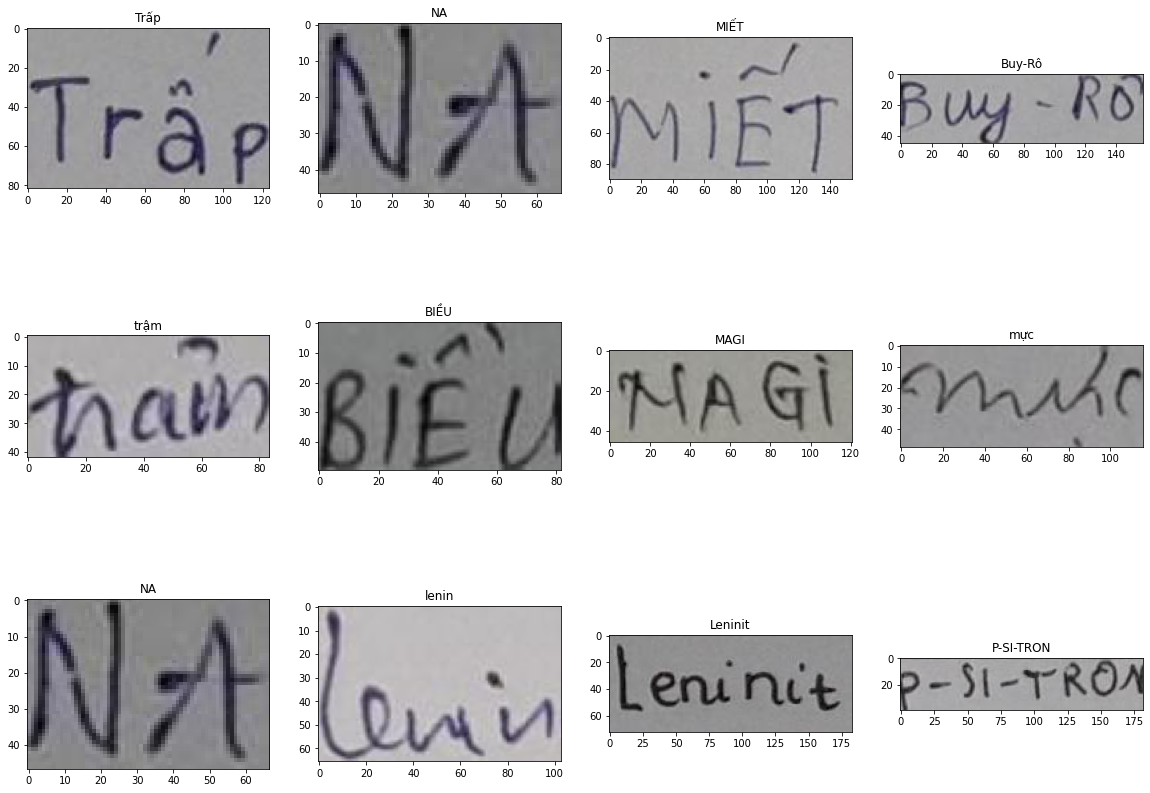

In [ ]:
plt.figure(figsize=(20,15))
for i in range(12):
    idx = torch.randint(200,())
    img = Image.open(os.path.join(SRC_PATH,os.listdir(SRC_PATH)[idx]))
    plt.subplot(3,4,i+1)
    plt.title(infer.predict(img))
    plt.imshow(img,cmap='gray')